### **Optimizing Delivery Logistics and Performance in Food Delivery Services**

* **Goal of the Project :** This project reflects the focus on analyzing and improving the efficiency and performance of food delivery operations.

* **Source Data :** !gdown 1WFa46c7_uSZ6GSzgYrDk4TKJd3y9zv8f

#### **Analyzing Key Metrics in Food Delivery Operations: A Detailed Dataset Overview**

1. **market_id (float64):** Identifier for the market or region in which the order was placed. This is likely a numeric ID corresponding to specific geographic areas.

2. **created_at (object):** The timestamp when the order was created. This is in object format, which usually indicates string data representing date and time.

3. **actual_delivery_time (object):** The timestamp when the order was actually delivered to the customer. Like **created_at**, this is also in object format, representing date and time.

4. **store_primary_category (int64):** An integer representing the primary category of the store from which the order was placed. This could correspond to categories such as "fast food," "grocery," "electronics," etc.

5. **order_protocol (float64):** A numeric code representing the protocol used for the order. This could indicate different ordering methods or systems used (e.g., website, app, phone).

6. **total_items (int64):** The total number of items in the order. This is a count of how many items were included in the particular order.

7. **subtotal (int64):** The total cost of items before taxes, fees, and discounts. This is the sum of the prices of all items in the order.

8. **num_distinct_items (int64):** The number of distinct item types in the order. For instance, if an order contains 3 burgers and 2 fries, this number would be 2.

9. **min_item_price (int64):** The price of the cheapest item in the order. This helps understand the range of item prices in the order.

10. **max_item_price (int64):** The price of the most expensive item in the order. This, along with min_item_price, can provide insight into the pricing spread of the items ordered.

11. **total_onshift_dashers (float64):** The total number of delivery personnel (dashers) available and on shift at the time of the order. This indicates the workforce available for delivering orders.

12. **total_busy_dashers (float64):** The number of delivery personnel (dashers) currently busy or occupied with other orders at the time of the order. This helps gauge the workload and potential delivery times.

13. **total_outstanding_orders (float64):** The total number of orders that are yet to be delivered at the time this order was placed. This provides an idea of the current backlog or demand on the delivery system.

14. **estimated_store_to_consumer_driving_duration (float64):** The estimated driving time (likely in minutes) from the store to the consumer's location. This is a crucial factor in predicting delivery times and planning logistics.

**1.Reading the dataset using pandas**

In [1]:
# Reading the dataset using pandas
import pandas as pd
df = pd.read_csv(r'raw_data.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


**2.Basic information of Dataset**

In [2]:
#Basic information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17


- **Entries**: The dataset contains 175,777 entries.
- **Content**: It tracks various aspects of food delivery orders.
- **Key Details**: Includes timestamps for order creation and delivery, store categories, order protocols, item details, and dasher (delivery person) metrics.
- **Purpose**: Useful for analyzing delivery logistics, performance, and order characteristics.



In [3]:
# shape of the dataset
df.shape

(175777, 14)

* Shape of the dataset contains 14 columns and 175777 rows.

In [4]:
# checking null values
df.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

**3. Data Transformantion**

In [5]:
# Converting to date and time datatype using pandas at two column

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [6]:
# Calculate the time difference in timedelta
df['time_taken'] = df['actual_delivery_time'] - df['created_at']

# Convert the timedelta to minutes
df['time_taken_mins'] = df['time_taken'].dt.total_seconds() / 60

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0


In [7]:
# Extract hour and day of the week from created_at
df["hour"] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek

# Display the first few rows of the dataframe
df.head()


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0,2,1


In [8]:
# Droping columns which are not required
df.drop(['time_taken', 'created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

**4. Data Visualization**

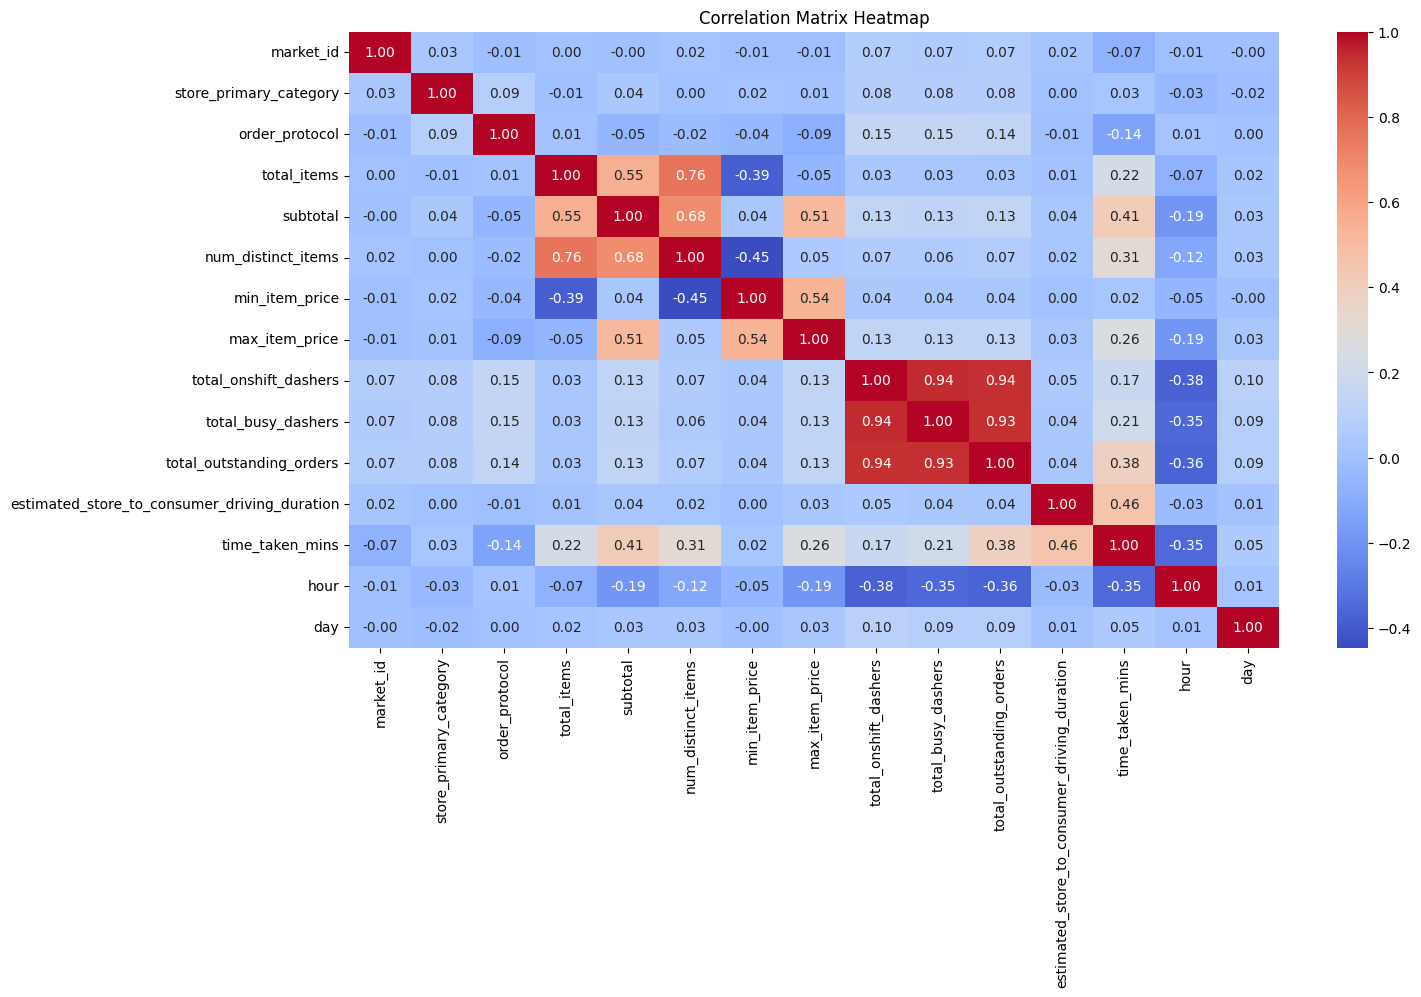

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


From the correlation heatmap, here are the columns with high correlations:

1. **total_onshift_dashers and total_busy_dashers**: Correlation = 0.94
2. **total_onshift_dashers and total_outstanding_orders**: Correlation = 0.94
3. **subtotal and total_items**: Correlation = 0.55
4. **subtotal and num_distinct_items**: Correlation = 0.68
5. **num_distinct_items and total_items**: Correlation = 0.76
6. **time_taken_mins and subtotal**: Correlation = 0.41
7. **time_taken_mins and estimated_store_to_consumer_driving_duration**: Correlation = 0.46

These are some of the reason that affects the Performance in Food Delivery Services

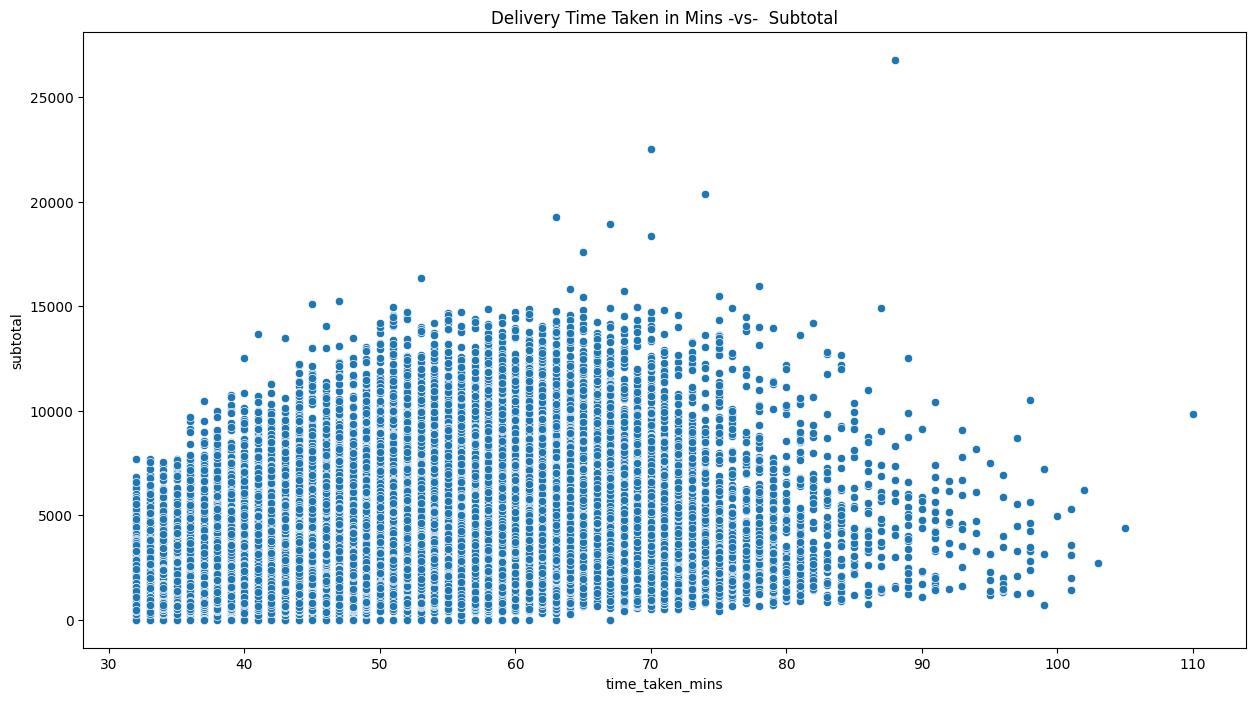

In [10]:
# x-axis: time taken for delivery in minutes
# y-axis: subtotal of the order
plt.figure(figsize=(15,8))
sns.scatterplot(x="time_taken_mins", y="subtotal", data=df)
plt.title("Delivery Time Taken in Mins -vs-  Subtotal")
plt.show() 

* The majority of orders have a subtotal ranging from 0 to 10,000 with delivery times spanning from 30 to 100 minutes.

* There is a noticeable concentration of data points indicating that many orders fall within the 40 to 80-minute delivery range and have subtotals between 5,000 to 15,000.

* A *few outlier points indicate orders with high subtotals* (above 15,000) and varying delivery times, though these are relatively rare.

* There seems to be a slight trend where *orders with higher subtotals tend to have a longer delivery time*, up to a point. Beyond 80 minutes, the frequency and range of subtotals decrease.


In [11]:
# Detecting Anomalies in the Dataset Using Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor()
df['lot_anomaly_score'] = model.fit_predict(df)

print("number of outliers : ", (len(df.loc[df["lot_anomaly_score"] == -1])))
df = df.loc[(df["lot_anomaly_score"]==1)]

number of outliers :  831


In [12]:
# Drop the outliers
df.drop(["lot_anomaly_score"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174946 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     174946 non-null  float64
 1   store_primary_category                        174946 non-null  int64  
 2   order_protocol                                174946 non-null  float64
 3   total_items                                   174946 non-null  int64  
 4   subtotal                                      174946 non-null  int64  
 5   num_distinct_items                            174946 non-null  int64  
 6   min_item_price                                174946 non-null  int64  
 7   max_item_price                                174946 non-null  int64  
 8   total_onshift_dashers                         174946 non-null  float64
 9   total_busy_dashers                            174946 

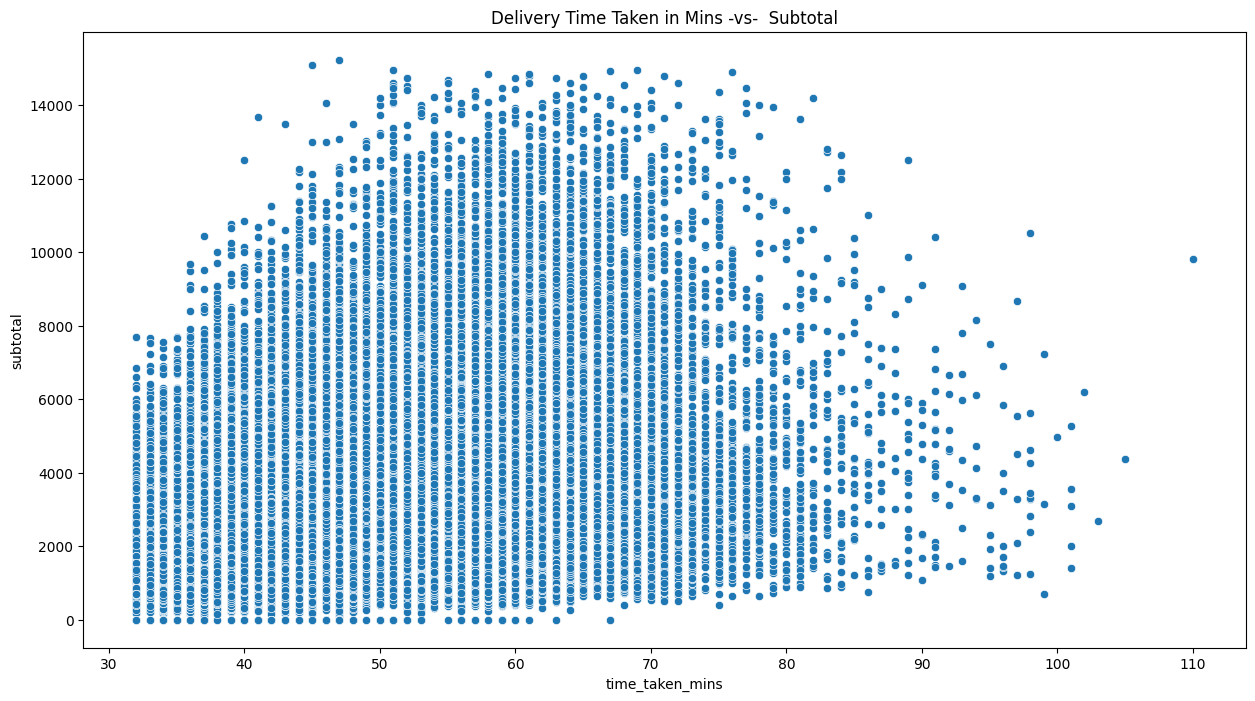

In [13]:
# x-axis: time taken for delivery in minutes
# y-axis: subtotal of the order
# After removing outliers
plt.figure(figsize=(15,8))
sns.scatterplot(x="time_taken_mins", y="subtotal", data=df)
plt.title("Delivery Time Taken in Mins -vs-  Subtotal")
plt.show() 

* Outlier points are eliminated and most of out order is between 110 minutes and cost is like below 15000.

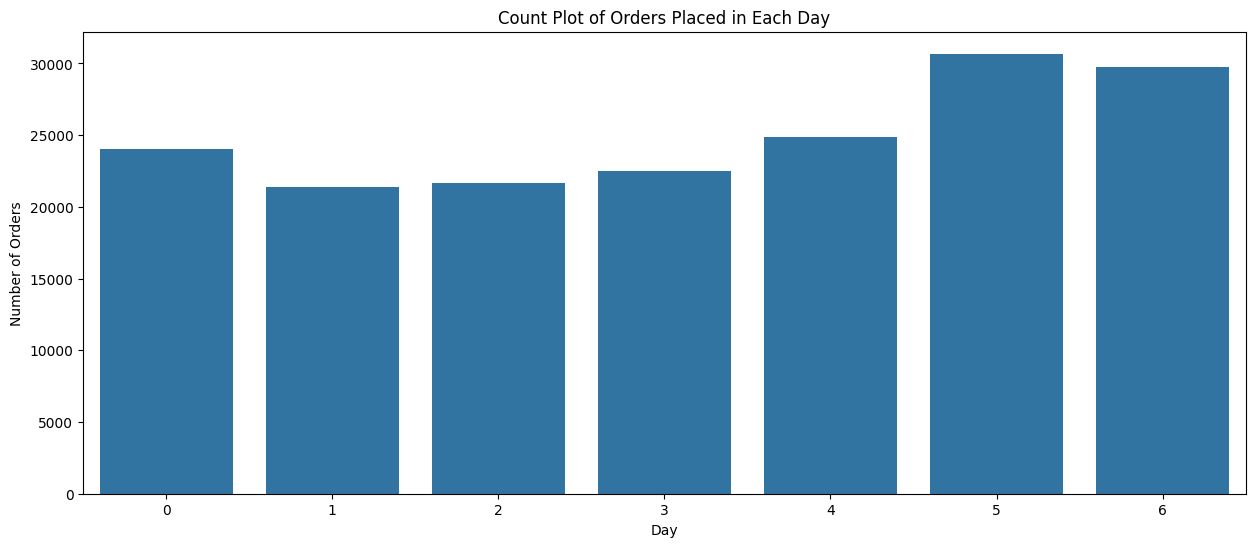

In [14]:
# Number of orders placed in a day using Histogram
plt.figure(figsize=(15, 6))  
sns.countplot(x='day', data=df)
plt.title("Count Plot of Orders Placed in Each Day")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.show()


* It's clear that the major orders are placed on weekends.

* The delivery time will be more on weedend compared to weekdays.

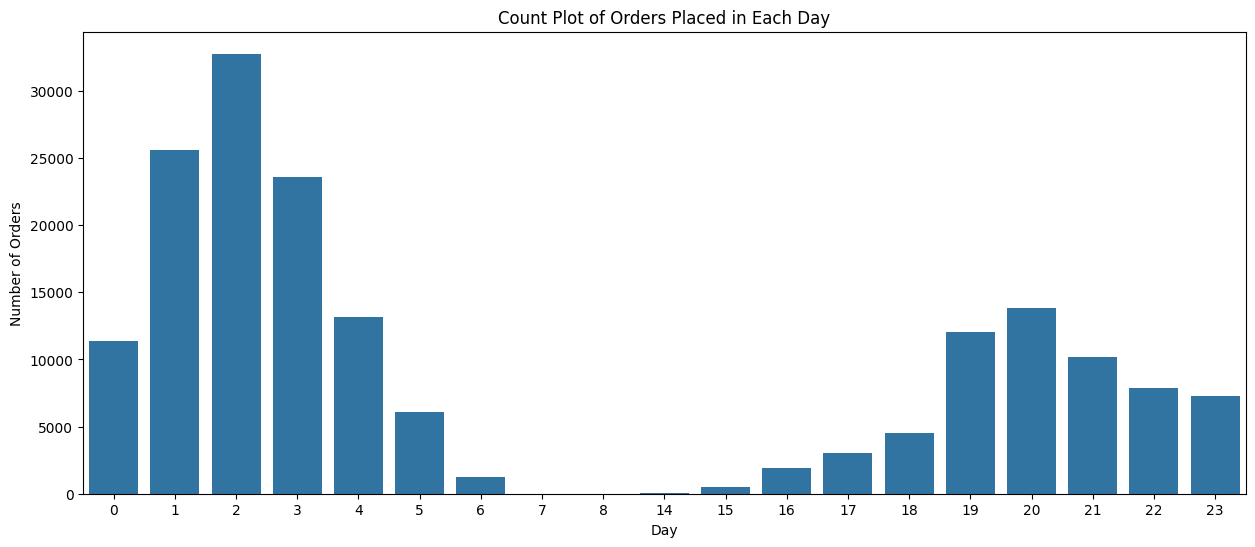

In [15]:
# Number of orders placed in a hour using Histogram
plt.figure(figsize=(15, 6))  
sns.countplot(x='hour', data=df)
plt.title("Count Plot of Orders Placed in Each Day")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.show()


* It shows that orders are placed more in night time 1:00 AM to 3:00 AM. 

* Delivery time will be also high due to less workers on these time period.

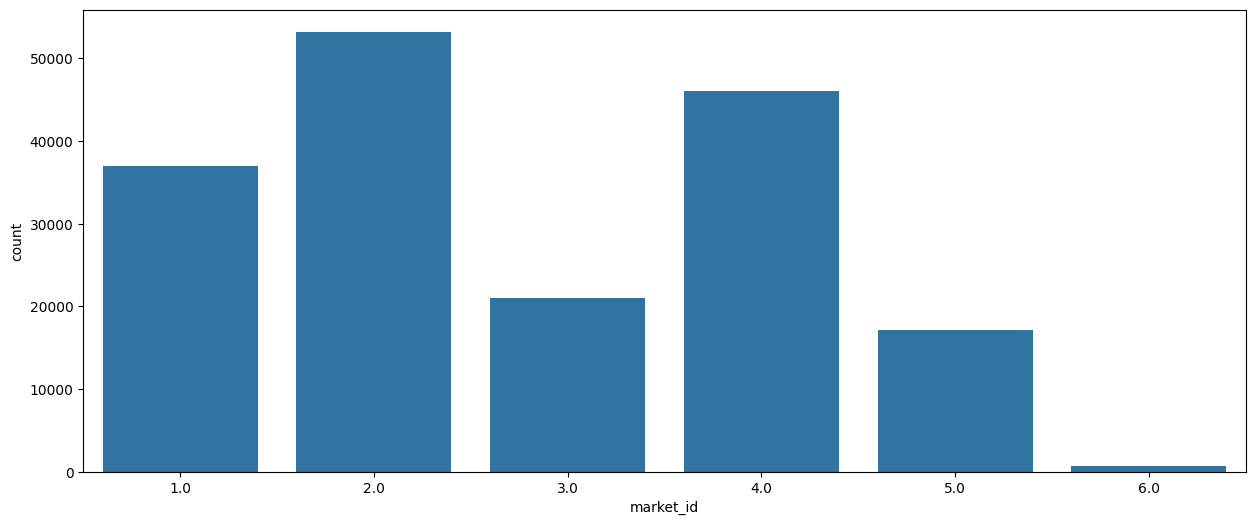

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(x="market_id", data=df)
plt.show()

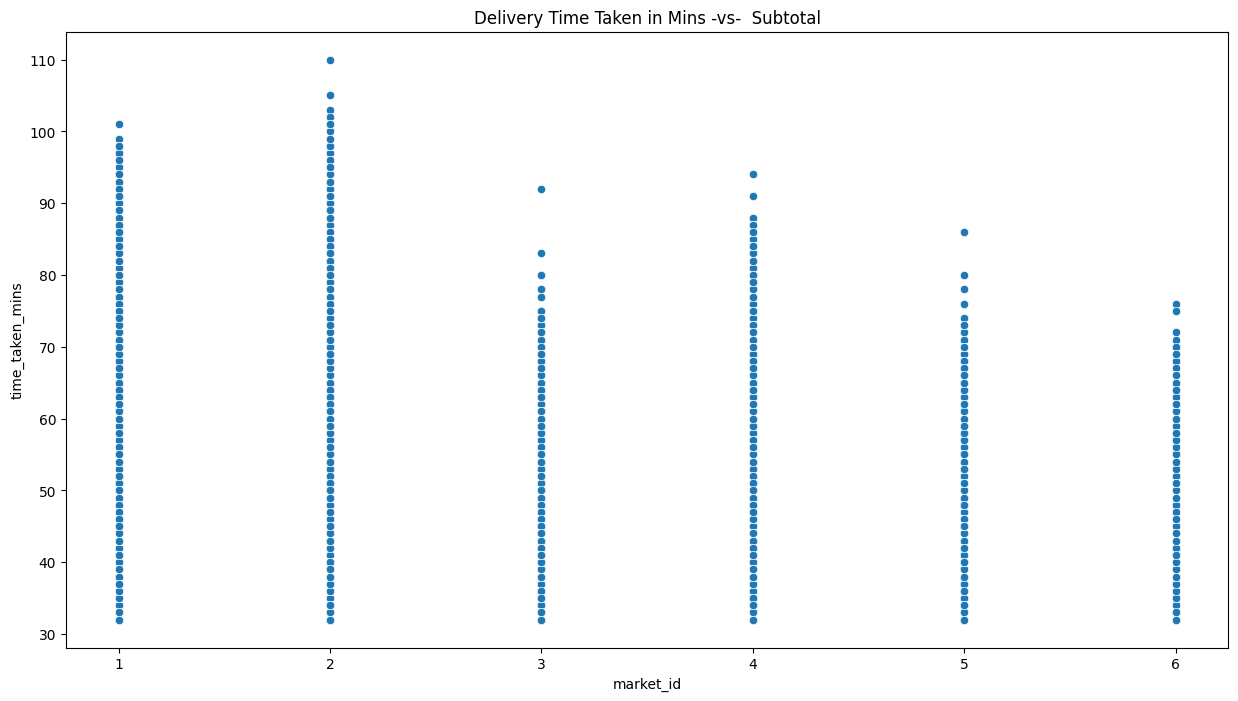

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="time_taken_mins", x="market_id", data=df)
plt.title("Delivery Time Taken in Mins -vs-  Subtotal")
plt.show() 

* It shows the number of oders placing to the market_id on specific geographic areas.
* Locality also affects the delivery time.

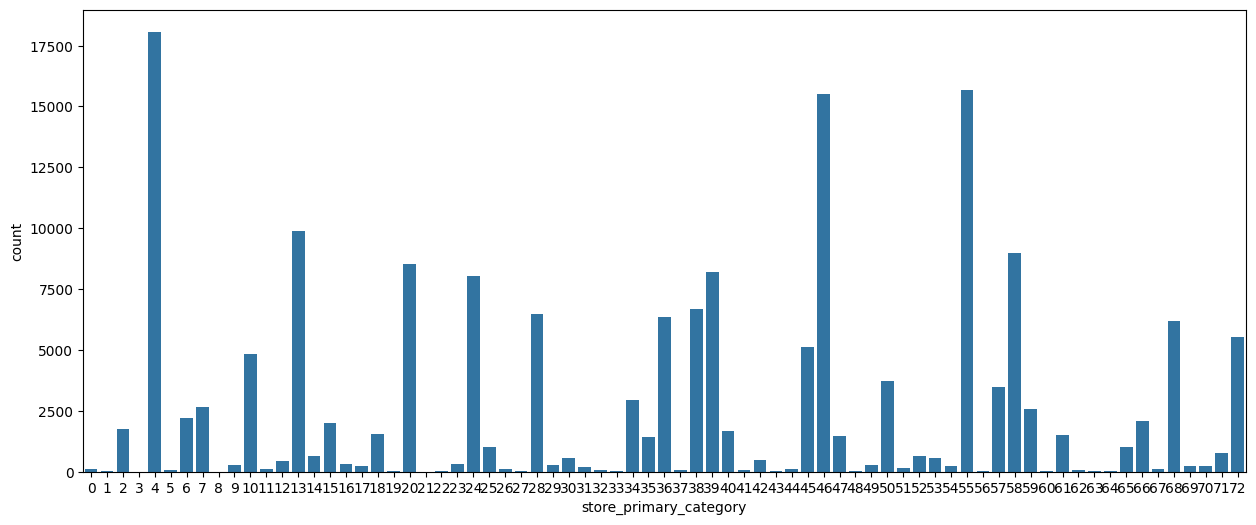

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x="store_primary_category", data=df)
plt.show()

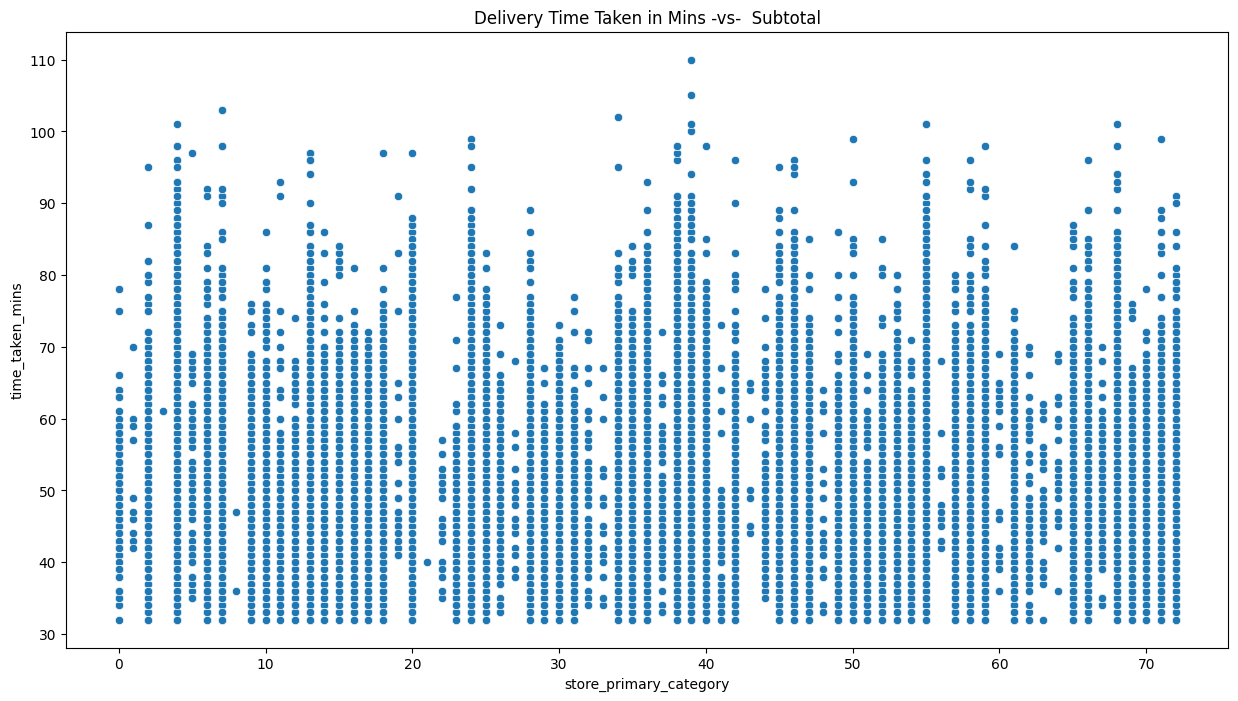

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="time_taken_mins", x="store_primary_category", data=df)
plt.title("Delivery Time Taken in Mins -vs-  Subtotal")
plt.show() 

* The certain resturant doesen't make any much impact in delivery time all seems are quit similar in delivery time.



##### Summary of Factors Affecting Delivery Time (`time_taken_mins`)

1. **Estimated Store to Consumer Driving Duration**:
   - **Correlation**: 0.46
   - **Impact**: The estimated driving duration from the store to the consumer is moderately correlated with the delivery time. Longer driving durations lead to increased delivery times.

2. **Subtotal**:
   - **Correlation**: 0.41
   - **Impact**: The order subtotal is moderately correlated with the delivery time. Higher order values tend to result in longer preparation and delivery times.

3. **Total Outstanding Orders**:
   - **Correlation**: 0.38
   - **Impact**: The number of outstanding orders is moderately correlated with the delivery time. A higher number of outstanding orders can increase delivery times due to higher demand and potential delays.

---

These factors are the most significant in affecting the delivery time. Optimizing these factors could help in reducing the overall delivery time.

In [20]:
df.head(5)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken_mins,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,21,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3,3
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,2,1


In [21]:
df.nunique()

market_id                                          6
store_primary_category                            73
order_protocol                                     7
total_items                                       53
subtotal                                        8146
num_distinct_items                                20
min_item_price                                  2201
max_item_price                                  2558
total_onshift_dashers                            172
total_busy_dashers                               158
total_outstanding_orders                         280
estimated_store_to_consumer_driving_duration    1277
time_taken_mins                                   74
hour                                              19
day                                                7
dtype: int64

**5. Modeling:**

In [22]:
#Train test spilt
from sklearn.model_selection import train_test_split

y = df["time_taken_mins"]
x = df.drop(['time_taken_mins'], axis=1)
df.drop(['time_taken_mins'],axis=1, inplace=True)
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
#Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [24]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = model.predict(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = MSE**.5
MAE = mean_absolute_error(y_test, pred)


In [25]:
#Evaluation Result
r2 = r2_score(y_test, pred)

print("r2_score : ", r2)
print("MSE : ", MSE)
print("RMSE : ", RMSE)
print("MAE : ",MAE)

r2_score :  0.9623903878285106
MSE :  3.235945935981709
RMSE :  1.7988735186170564
MAE :  1.2883935410117175


In [26]:
# from sklearn.model_selection import GridSearchCV
# import numpy as np


# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=10), 
#                            param_grid=param_grid, 
#                            cv=5, 
#                            n_jobs=-1, 
#                            scoring='r2')


# grid_search.fit(X_train, y_train)


# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)


# best_model = RandomForestRegressor(**best_params, random_state=10)
# best_model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = best_model.predict(x_test)
# print("Improved R2 Score:", r2_score(y_test, y_pred))
# print("Improved MSE:", mean_squared_error(y_test, y_pred))
# print("Improved RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# print("Improved MAE:", mean_absolute_error(y_test, y_pred))

# # It's taking more time so I stopped, if anyone is looking on these peoject and you have an good laptop, yoou can try it 

In [28]:
X_train.head(5)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day
174807,2.0,46,1.0,1,2899,1,2599,2599,31.0,39.0,36.0,371.0,21,5
53952,4.0,46,3.0,5,4554,3,782,1196,58.0,45.0,78.0,556.0,19,4
8150,3.0,55,3.0,2,1724,2,825,899,4.0,5.0,9.0,749.0,2,5
1122,4.0,24,5.0,2,2830,2,1150,1295,110.0,70.0,115.0,248.0,2,4
28762,3.0,55,3.0,6,5399,5,549,1399,48.0,47.0,44.0,358.0,2,4


##### **Feature importance of data**

Text(0.5, 0, 'Feature importance in these Model')

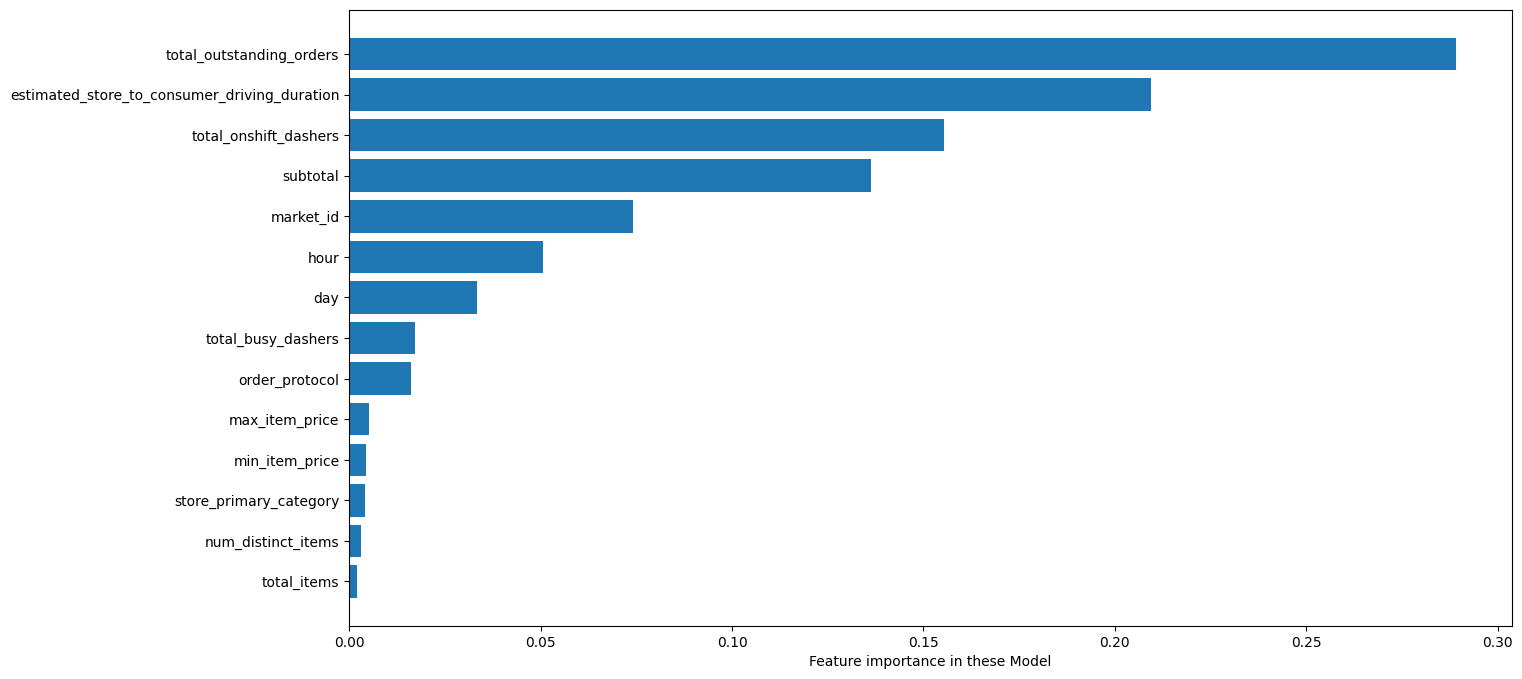

In [27]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(15,8))
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature importance in these Model")